In [116]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [14]:
plt.rcParams["figure.dpi"] = 120

In [15]:
data_dir = "../data"

In [ ]:
# AG-Pubmed (before fix), Identity Counterfactual

dfs = [
    (
        "BERT",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/bert_results_719253_ds-ag-pubmed.pkl"),
    ),
    # (
    #     "RoBERTa",
    #     "Sports",
    #     pd.read_pickle(f"{data_dir}/full/"),
    # ),
    (
        "ALBERT",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/albert_results_719278_ds-ag-pubmed.pkl"),
    ),
    (
        "DistilBERT",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/distilbert_results_719275_ds-ag-pubmed.pkl"),
    ),
    (
        "ELECTRA",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/electra_results_719265_ds-ag-pubmed.pkl"),
    ),
]

In [ ]:
# # AG-Pubmed (before fix), Constant Counterfactual

# dfs = [
#     (
#         "BERT",
#         "Sports",
#         pd.read_pickle(
#             f"{data_dir}/full/bert_results_719289_cf-constant_ds-ag-pubmed.pkl"
#         ),
#     ),
#     # (
#     #     "RoBERTa",
#     #     "Sports",
#     #     pd.read_pickle(f"{data_dir}/full/"),
#     # ),
#     (
#         "ALBERT",
#         "Sports",
#         pd.read_pickle(
#             f"{data_dir}/full/albert_results_719285_cf-constant_ds-ag-pubmed.pkl"
#         ),
#     ),
#     (
#         "DistilBERT",
#         "Sports",
#         pd.read_pickle(
#             f"{data_dir}/full/distilbert_results_719286_cf-constant_ds-ag-pubmed.pkl"
#         ),
#     ),
#     (
#         "ELECTRA",
#         "Sports",
#         pd.read_pickle(
#             f"{data_dir}/full/electra_results_719288_cf-constant_ds-ag-pubmed.pkl"
#         ),
#     ),
# ]

In [97]:
# MMLU, Identity Counterfactual

dfs = [
    (
        "BERT",
        "Computer Security",
        pd.read_pickle(f"{data_dir}/full/bert_results_719254_ds-mmlu.pkl"),
    ),
    (
        "RoBERTa",
        "Computer Security",
        pd.read_pickle(f"{data_dir}/full/roberta_results_719262_ds-mmlu.pkl"),
    ),
    (
        "ALBERT",
        "Computer Security",
        pd.read_pickle(f"{data_dir}/full/albert_results_719263_ds-mmlu.pkl"),
    ),
    (
        "DistilBERT",
        "Computer Security",
        pd.read_pickle(f"{data_dir}/full/distilbert_results_719264_ds-mmlu.pkl"),
    ),
    (
        "ELECTRA",
        "Computer Security",
        pd.read_pickle(f"{data_dir}/full/electra_results_719261_ds-mmlu.pkl"),
    ),
]

In [ ]:
# # MMLU, Constant Counterfactual

# dfs = [
#     (
#         "BERT",
#         "Computer Security",
#         pd.read_pickle(f"{data_dir}/full/bert_results_719284_cf-constant_ds-mmlu.pkl"),
#     ),
#     (
#         "RoBERTa",
#         "Computer Security",
#         pd.read_pickle(
#             f"{data_dir}/full/roberta_results_719282_cf-constant_ds-mmlu.pkl"
#         ),
#     ),
#     (
#         "ALBERT",
#         "Computer Security",
#         pd.read_pickle(
#             f"{data_dir}/full/albert_results_719280_cf-constant_ds-mmlu.pkl"
#         ),
#     ),
#     (
#         "DistilBERT",
#         "Computer Security",
#         pd.read_pickle(
#             f"{data_dir}/full/distilbert_results_719281_cf-constant_ds-mmlu.pkl"
#         ),
#     ),
#     (
#         "ELECTRA",
#         "Computer Security",
#         pd.read_pickle(
#             f"{data_dir}/full/electra_results_719283_cf-constant_ds-mmlu.pkl"
#         ),
#     ),
# ]

In [19]:
# ScienceQA-LegalQA, Identity Counterfactual

dfs = [
    (
        "BERT",
        "geography",
        pd.read_pickle(f"{data_dir}/full/bert_results_719337_ds-scienceqa-legalqa.pkl"),
    ),
    (
        "RoBERTa",
        "geography",
        pd.read_pickle(
            f"{data_dir}/full/roberta_results_719340_ds-scienceqa-legalqa.pkl"
        ),
    ),
    (
        "ALBERT",
        "geography",
        pd.read_pickle(
            f"{data_dir}/full/albert_results_719341_ds-scienceqa-legalqa.pkl"
        ),
    ),
    (
        "DistilBERT",
        "geography",
        pd.read_pickle(
            f"{data_dir}/full/distilbert_results_719342_ds-scienceqa-legalqa.pkl"
        ),
    ),
    (
        "ELECTRA",
        "geography",
        pd.read_pickle(
            f"{data_dir}/full/electra_results_719339_ds-scienceqa-legalqa.pkl"
        ),
    ),
]

In [77]:
# ScienceQA-LegalQA, BERT Different Counterfactuals

dfs = [
    (
        "BERT Identity",
        "geography",
        pd.read_pickle(f"{data_dir}/full/bert_results_1263_ds-scienceqa-legalqa.pkl"),
    ),
    (
        "BERT Constant",
        "geography",
        pd.read_pickle(f"{data_dir}/full/bert_results_1261_cf-constant_ds-scienceqa-legalqa.pkl"),
    ),
    (
        "BERT Synonym",
        "geography",
        pd.read_pickle(
            f"{data_dir}/full/bert_results_1239_cf-synonym_ds-scienceqa-legalqa.pkl"
        ),
    ),
    (
        "BERT Random",
        "geography",
        pd.read_pickle(
            f"{data_dir}/full/bert_results_1240_cf-random_ds-scienceqa-legalqa.pkl"
        ),
    ),
]

In [14]:
# AG-Pubmed, BERT Different Counterfactuals

dfs = [
    (
        "BERT Identity",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/bert_results_719253_ds-ag-pubmed.pkl"),
    ),
    (
        "BERT Constant",
        "Sports",
        pd.read_pickle(
            f"{data_dir}/full/bert_results_719289_cf-constant_ds-ag-pubmed.pkl"
        ),
    ),
    (
        "BERT Synonym",
        "Sports",
        pd.read_pickle(
            f"{data_dir}/full/bert_results_2451_cf-synonym_ds-ag-pubmed.pkl"
        ),
    ),
    (
        "BERT Random",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/bert_results_2452_cf-random_ds-ag-pubmed.pkl"),
    ),
]

dfs = [
    (name, trained_label, df[df["label"].isin(["Sports", "Medicine"])])
    for name, trained_label, df in dfs
]

In [87]:
# MMLU, BERT Different Counterfactuals

dfs = [
    (
        "BERT Identity",
        "Computer Security",
        pd.read_pickle(f"{data_dir}/full/bert_results_719254_ds-mmlu.pkl"),
    ),
    (
        "BERT Constant",
        "Computer Security",
        pd.read_pickle(f"{data_dir}/full/bert_results_719284_cf-constant_ds-mmlu.pkl"),
    ),
    (
        "BERT Synonym",
        "Computer Security",
        pd.read_pickle(f"{data_dir}/full/bert_results_2524_cf-synonym_ds-mmlu.pkl"),
    ),
    (
        "BERT Random",
        "Computer Security",
        pd.read_pickle(f"{data_dir}/full/bert_results_2525_cf-random_ds-mmlu.pkl"),
    ),
]

In [ ]:
# # MMLU, GPT

# dfs = [
#     (
#         "GPT Identity",
#         "Computer Security",
#         pd.read_pickle(f"{data_dir}/full/gpt2_results_5032_ds-mmlu.pkl"),
#     ),
# ]

In [ ]:
# MMLU, Identity, 3 Epochs vs 100

dfs = [
    (
        "BERT 3",
        "Computer Security",
        pd.read_pickle(f"{data_dir}/full/bert_results_719254_ds-mmlu.pkl"),
    ),
    (
        "BERT 100",
        "Computer Security",
        pd.read_pickle(f"{data_dir}/full/bert_results_5792_ds-mmlu.pkl"),
    ),
]

In [253]:
# AG-News, Identity Counterfactual

dfs = [
    (
        "BERT 100",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/bert_results_5795_ds-ag_news.pkl"),
    ),
    (
        "BERT",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/bert_results_5877_ds-ag_news.pkl"),
    ),
    (
        "RoBERTa",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/roberta_results_5904_ds-ag_news.pkl"),
    ),
    (
        "ALBERT",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/albert_results_5905_ds-ag_news.pkl"),
    ),
    (
        "DistilBERT",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/distilbert_results_5906_ds-ag_news.pkl"),
    ),
    (
        "ELECTRA",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/electra_results_5903_ds-ag_news.pkl"),
    ),
]

In [149]:
# AG-News, BERT Different Counterfactuals

dfs = [
    (
        "BERT Identity",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/bert_results_5877_ds-ag_news.pkl"),
    ),
    (
        "BERT Constant",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/bert_results_5917_cf-constant_ds-ag_news.pkl"),
    ),
    (
        "BERT Synonym",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/bert_results_5918_cf-synonym_ds-ag_news.pkl"),
    ),
    (
        "BERT Random",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/bert_results_5919_cf-random_ds-ag_news.pkl"),
    ),
]

In [261]:
# ScienceQA, Identity Counterfactual

dfs = [
    (
        "BERT",
        "geography",
        pd.read_pickle(f"{data_dir}/full/bert_results_6079_ds-scienceqa.pkl"),
    ),
    (
        "RoBERTa",
        "geography",
        pd.read_pickle(f"{data_dir}/full/roberta_results_6080_ds-scienceqa.pkl"),
    ),
    (
        "ALBERT",
        "geography",
        pd.read_pickle(f"{data_dir}/full/albert_results_6081_ds-scienceqa.pkl"),
    ),
    (
        "DistilBERT",
        "geography",
        pd.read_pickle(f"{data_dir}/full/distilbert_results_6082_ds-scienceqa.pkl"),
    ),
    (
        "ELECTRA",
        "geography",
        pd.read_pickle(f"{data_dir}/full/electra_results_6083_ds-scienceqa.pkl"),
    ),
]

In [311]:
# ScienceQA, BERT Different Counterfactuals

dfs = [
    (
        "BERT Identity",
        "geography",
        pd.read_pickle(f"{data_dir}/full/bert_results_6079_ds-scienceqa.pkl"),
    ),
    (
        "BERT Constant",
        "geography",
        pd.read_pickle(f"{data_dir}/full/bert_results_6084_cf-constant_ds-scienceqa.pkl"),
    ),
    (
        "BERT Synonym",
        "geography",
        pd.read_pickle(f"{data_dir}/full/bert_results_6085_cf-synonym_ds-scienceqa.pkl"),
    ),
    (
        "BERT Random",
        "geography",
        pd.read_pickle(f"{data_dir}/full/bert_results_6086_cf-random_ds-scienceqa.pkl"),
    ),
]

In [312]:
for _, trained_label, df in dfs:
    df.dropna(
        subset=["uncertainty_before", "uncertainty_after", "uncertainty_difference"],
        inplace=True,
    )
    df["uncertainty_difference_relative"] = df["uncertainty_difference"] / df[
        "uncertainty_before"
    ].replace([np.inf, -np.inf], np.nan)
    df["uncertainty_ratio"] = (
        df["uncertainty_after"] / df["uncertainty_before"]
    ).replace([np.inf, -np.inf], np.nan)

    df["trained"] = df["label"].apply(
        lambda x: trained_label if x == trained_label else "Other"
    )

In [313]:
dfs_trained_melted = [
    (
        name,
        trained_label,
        df[["trained", "uncertainty_before", "uncertainty_after"]].melt(
            id_vars=["trained"],
            value_vars=["uncertainty_before", "uncertainty_after"],
            var_name="type",
            value_name="uncertainty",
        ),
    )
    for name, trained_label, df in dfs
]

In [314]:
dfs_melted = [
    (
        name,
        trained_label,
        df[["label", "uncertainty_before", "uncertainty_after"]].melt(
            id_vars=["label"],
            value_vars=["uncertainty_before", "uncertainty_after"],
            var_name="type",
            value_name="uncertainty",
        ),
    )
    for name, trained_label, df in dfs
]

In [315]:
for _, __, df_melted in dfs_melted:
    df_melted["type"] = df_melted["type"].map(
        {
            "uncertainty_before": "Before",
            "uncertainty_after": "After",
        }
    )

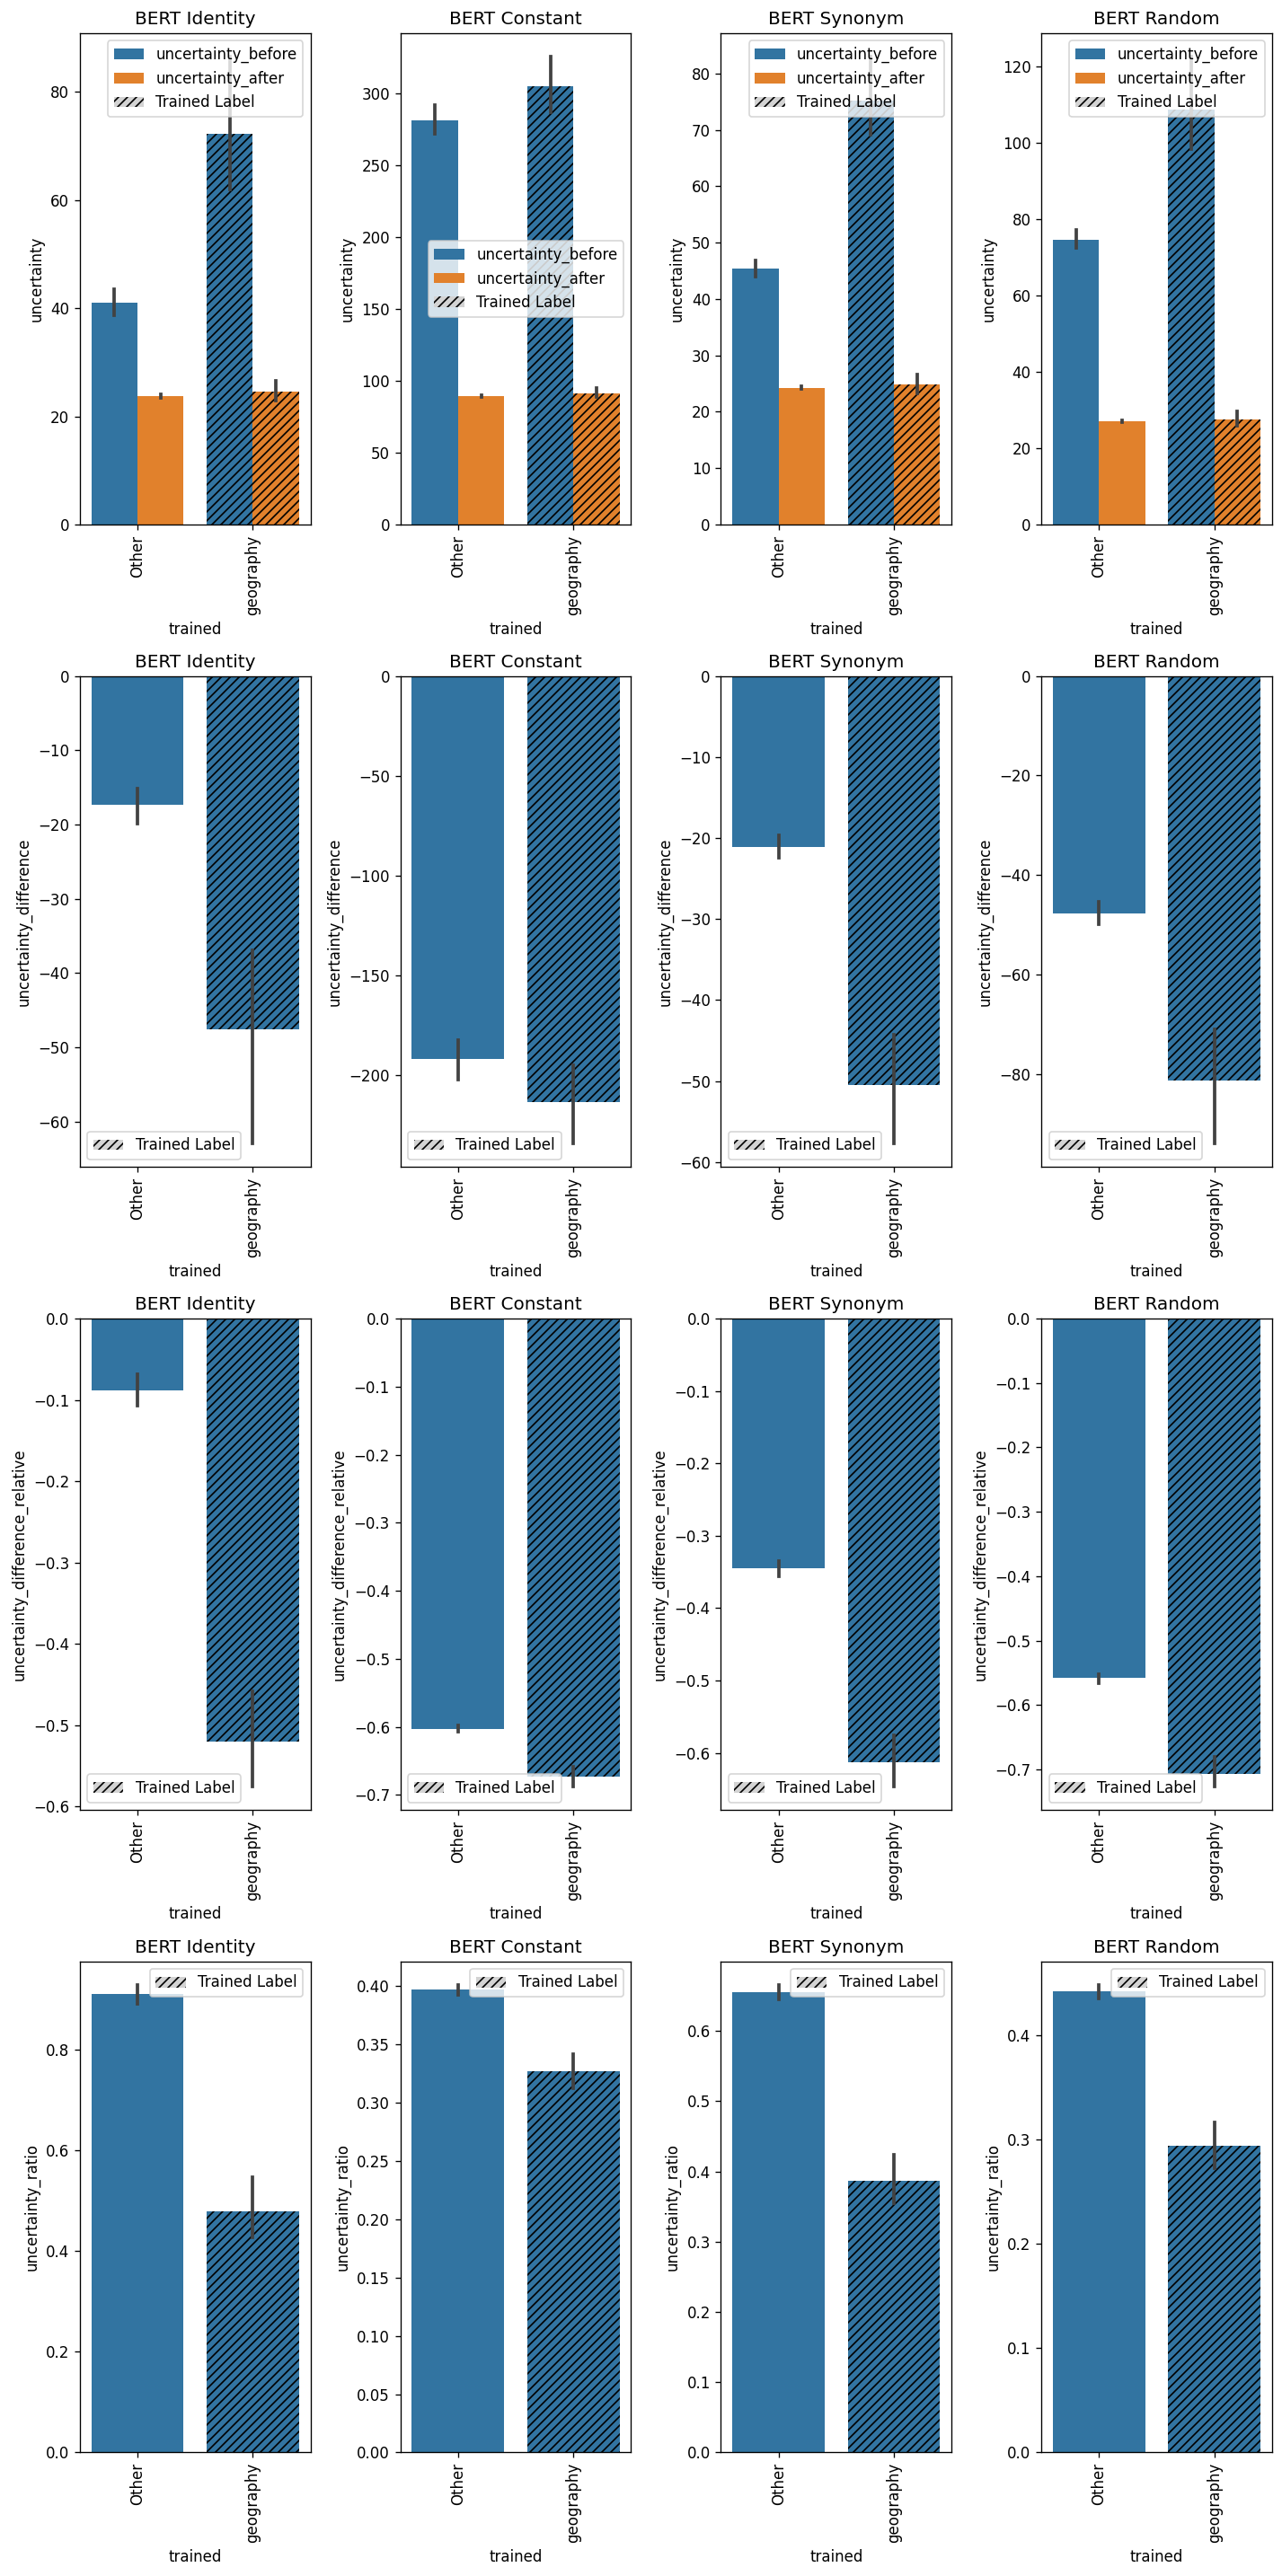

In [316]:
plt_width = 3
plt_height = 6

x_plots = len(dfs)
y_plots = 4

fig, axs = plt.subplots(
    y_plots,
    x_plots,
    figsize=(x_plots * plt_width, y_plots * plt_height),
    squeeze=False,
)

for i in range(len(dfs)):
    name, trained_label, df = dfs[i]
    _, __, df_trained_melted = dfs_trained_melted[i]

    sns.barplot(data=df_trained_melted, x="trained", y="uncertainty", hue="type", ax=axs[0][i])
    sns.barplot(data=df, x="trained", y="uncertainty_difference", ax=axs[1][i])
    sns.barplot(data=df, x="trained", y="uncertainty_difference_relative", ax=axs[2][i])
    sns.barplot(data=df, x="trained", y="uncertainty_ratio", ax=axs[3][i])


    for row_idx, ax in enumerate(axs.T[i]):
        x_ticks = ax.get_xticks()
        x_labels = [text.get_text() for text in ax.get_xticklabels()]

        # Find the position of the trained_label
        trained_pos = -1
        for pos, label in enumerate(x_labels):
            if label == trained_label:
                trained_pos = pos
                break

        if trained_pos != -1:
            # For each bar, check if its center is close to the trained_label tick position
            for bar in ax.patches:
                # Calculate bar center
                bar_center = bar.get_x() + bar.get_width() / 2

                # If bar center is close to the trained_label tick, hatch it
                if abs(bar_center - x_ticks[trained_pos]) < 0.5:
                    bar.set_hatch("////")

        ax.tick_params(axis="x", labelrotation=90)

    hatch_patch = Patch(facecolor='lightgray', hatch='////', label='Trained Label')
    
    for row_idx, ax in enumerate(axs.T[i]):
        if row_idx == 0:  # First row has existing legend from hue
            handles, labels = ax.get_legend_handles_labels()
            handles.append(hatch_patch)
            labels.append('Trained Label')
            ax.legend(handles=handles, labels=labels)
        else:  # Other rows don't have legends, so create new one
            ax.legend(handles=[hatch_patch], labels=['Trained Label'])
        
        ax.tick_params(axis="x", labelrotation=90)
        ax.set_title(name)

    for ax in axs.T[i]:
        ax.tick_params(axis="x", labelrotation=90)
        ax.set_title(name)

plt.tight_layout()

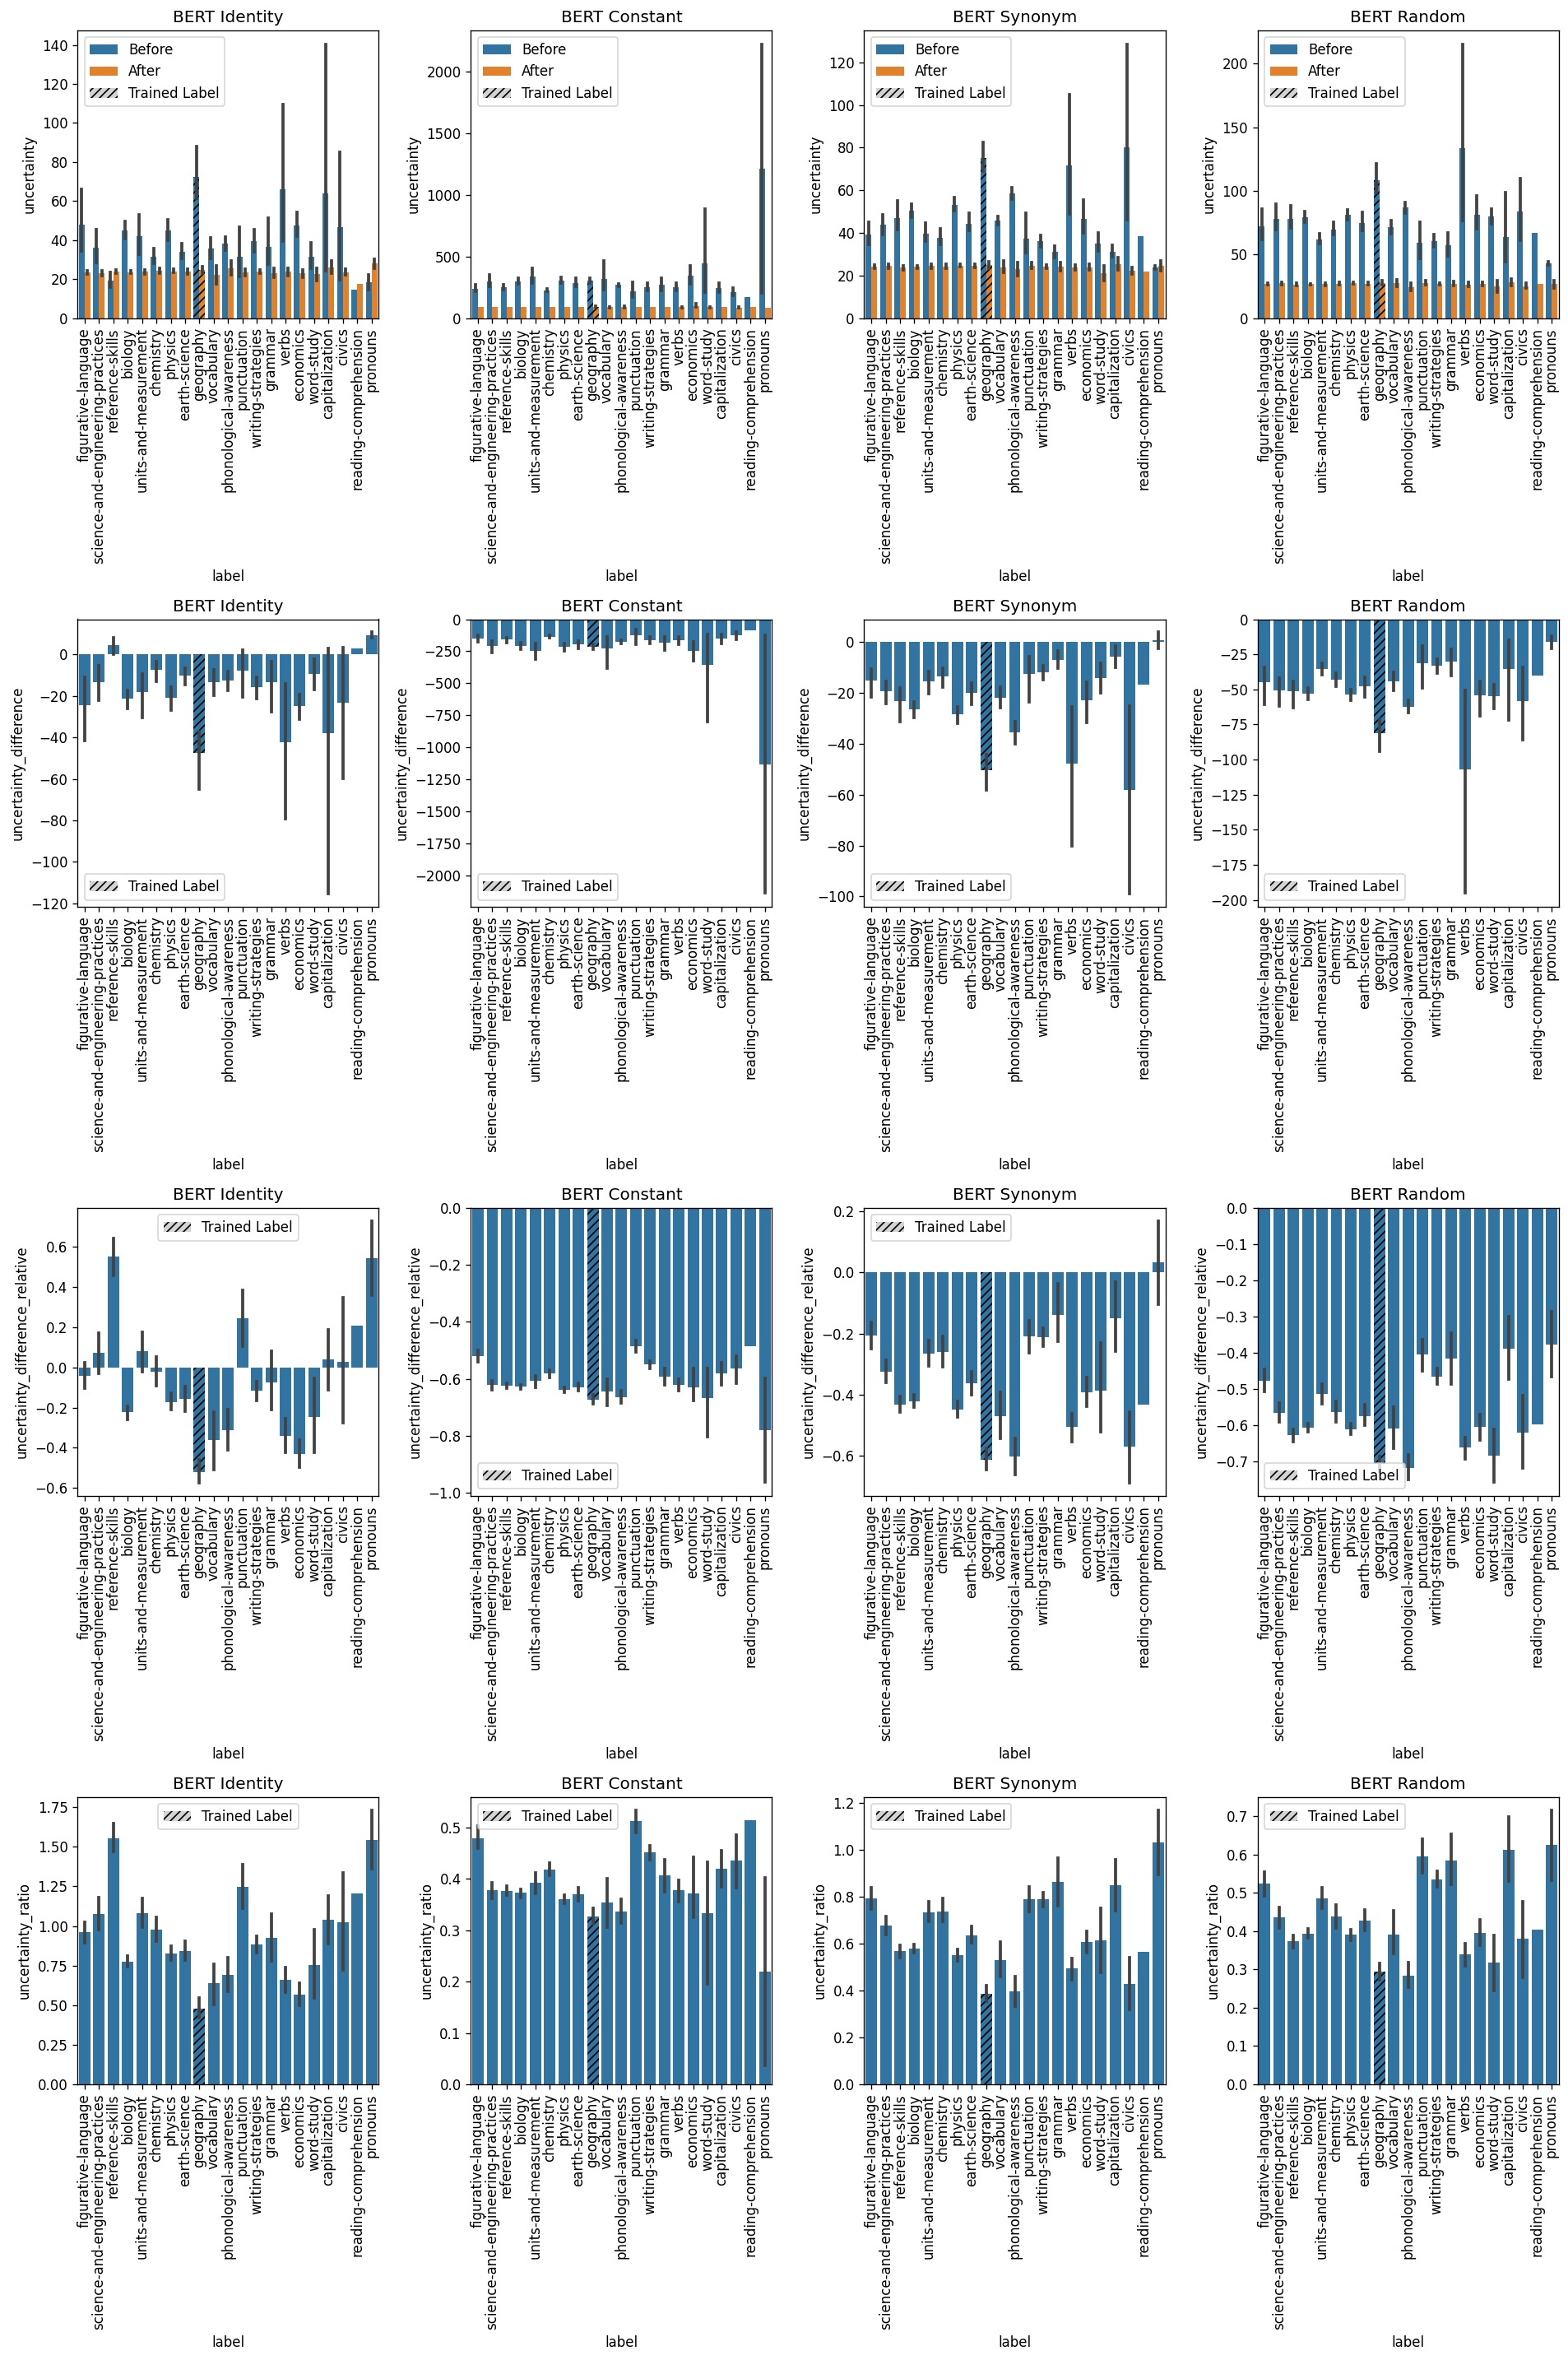

In [317]:
plt_width = 4
plt_height = 6

x_plots = len(dfs)
y_plots = 4

fig, axs = plt.subplots(
    y_plots,
    x_plots,
    figsize=(x_plots * plt_width, y_plots * plt_height),
    squeeze=False,
)

for i in range(len(dfs)):
    name, trained_label, df = dfs[i]
    _, __, df_melted = dfs_melted[i]

    sns.barplot(data=df_melted, x="label", y="uncertainty", hue="type", ax=axs[0][i])
    sns.barplot(data=df, x="label", y="uncertainty_difference", ax=axs[1][i])
    sns.barplot(data=df, x="label", y="uncertainty_difference_relative", ax=axs[2][i])
    sns.barplot(data=df, x="label", y="uncertainty_ratio", ax=axs[3][i])


    for row_idx, ax in enumerate(axs.T[i]):
        x_ticks = ax.get_xticks()
        x_labels = [text.get_text() for text in ax.get_xticklabels()]

        # Find the position of the trained_label
        trained_pos = -1
        for pos, label in enumerate(x_labels):
            if label == trained_label:
                trained_pos = pos
                break

        if trained_pos != -1:
            # For each bar, check if its center is close to the trained_label tick position
            for bar in ax.patches:
                # Calculate bar center
                bar_center = bar.get_x() + bar.get_width() / 2

                # If bar center is close to the trained_label tick, hatch it
                if abs(bar_center - x_ticks[trained_pos]) < 0.5:
                    bar.set_hatch("////")

        ax.tick_params(axis="x", labelrotation=90)

    hatch_patch = Patch(facecolor='lightgray', hatch='////', label='Trained Label')
    
    for row_idx, ax in enumerate(axs.T[i]):
        if row_idx == 0:  # First row has existing legend from hue
            handles, labels = ax.get_legend_handles_labels()
            handles.append(hatch_patch)
            labels.append('Trained Label')
            ax.legend(handles=handles, labels=labels)
        else:  # Other rows don't have legends, so create new one
            ax.legend(handles=[hatch_patch], labels=['Trained Label'])
        
        ax.tick_params(axis="x", labelrotation=90)
        ax.set_title(name)

    for ax in axs.T[i]:
        ax.tick_params(axis="x", labelrotation=90)
        ax.set_title(name)

plt.tight_layout()

In [318]:
def t_tests(dfs, metric):
    for name, trained_label, df in dfs:
        trained_group = df[df["label"] == trained_label][metric]
        other_groups = df[df["label"] != trained_label][metric]

        t_stat, p_value = ttest_ind(trained_group, other_groups, equal_var=False)

        print(
            f"{name:<10} {trained_label} vs Others T-statistic: {t_stat:>12.4f}, P-value: {p_value:.4f}"
        )
    
    print()

    for name, trained_label, df in dfs:
        trained_group = df[df["label"] == trained_label][metric]

        labels = df["label"].unique()

        for label in labels:
            if label != trained_label:
                other_group = df[df["label"] == label][metric]
                t_stat, p_value = ttest_ind(trained_group, other_group, equal_var=False)
                print(
                    f"{name:<10} {trained_label} vs {label:<10} T-statistic: {t_stat:>12.4f}, P-value: {p_value:.4f}"
                )

In [319]:
t_tests(dfs, "uncertainty_difference_relative")

BERT Identity geography vs Others T-statistic:     -14.0396, P-value: 0.0000
BERT Constant geography vs Others T-statistic:      -8.7096, P-value: 0.0000
BERT Synonym geography vs Others T-statistic:     -14.4314, P-value: 0.0000
BERT Random geography vs Others T-statistic:     -12.3273, P-value: 0.0000

BERT Identity geography vs figurative-language T-statistic:     -10.8596, P-value: 0.0000
BERT Identity geography vs science-and-engineering-practices T-statistic:     -10.1443, P-value: 0.0000
BERT Identity geography vs reference-skills T-statistic:     -19.5282, P-value: 0.0000
BERT Identity geography vs biology    T-statistic:      -8.8688, P-value: 0.0000
BERT Identity geography vs units-and-measurement T-statistic:     -10.6888, P-value: 0.0000
BERT Identity geography vs chemistry  T-statistic:     -10.2866, P-value: 0.0000
BERT Identity geography vs physics    T-statistic:      -9.6070, P-value: 0.0000
BERT Identity geography vs earth-science T-statistic:      -8.5353, P-value: 0

In [320]:
t_tests(dfs, "uncertainty_ratio")

BERT Identity geography vs Others T-statistic:     -14.0396, P-value: 0.0000
BERT Constant geography vs Others T-statistic:      -8.7096, P-value: 0.0000
BERT Synonym geography vs Others T-statistic:     -14.4314, P-value: 0.0000
BERT Random geography vs Others T-statistic:     -12.3273, P-value: 0.0000

BERT Identity geography vs figurative-language T-statistic:     -10.8596, P-value: 0.0000
BERT Identity geography vs science-and-engineering-practices T-statistic:     -10.1443, P-value: 0.0000
BERT Identity geography vs reference-skills T-statistic:     -19.5282, P-value: 0.0000
BERT Identity geography vs biology    T-statistic:      -8.8688, P-value: 0.0000
BERT Identity geography vs units-and-measurement T-statistic:     -10.6888, P-value: 0.0000
BERT Identity geography vs chemistry  T-statistic:     -10.2866, P-value: 0.0000
BERT Identity geography vs physics    T-statistic:      -9.6070, P-value: 0.0000
BERT Identity geography vs earth-science T-statistic:      -8.5353, P-value: 0